In [64]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from sklearn import preprocessing
from statsmodels.graphics.regressionplots import *

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

from scipy.stats import ttest_ind

sns.set_context('notebook')

In [65]:
total_set = pd.read_csv('../data/raw/album_ratings.csv')

In [66]:
decade = total_set['Release Year']
decade = decade/10
decade = decade.astype(int)
decade = (decade * 10)

total_set['Release Decade'] = decade


In [162]:
post_70_set = total_set[(total_set['Release Year'] > 1970) & (total_set['Release Year'] < 2020) ]
post_70_set = post_70_set.dropna(subset='Release Month')
post_70_set = post_70_set.dropna(subset='Genre')
post_70_set['Metacritic User Score'] = post_70_set['Metacritic User Score'] * 10

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\732581157.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


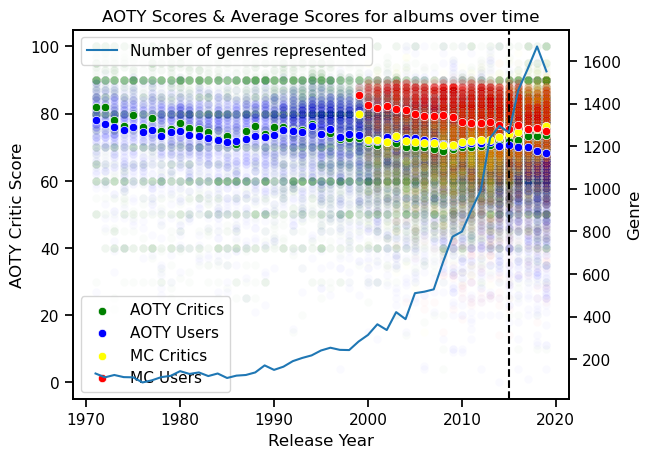

In [110]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="Green", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="Blue", alpha=0.02, ax=ax)

sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic Critic Score', color="Yellow", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic User Score', color="Red", alpha=0.02, ax=ax)

plt.title('AOTY Scores & Average Scores for albums over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='AOTY Critics', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='AOTY Users', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic Critic Score', color='Yellow', label='MC Critics', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic User Score', color='Red', label='MC Users', ax=ax)

count_df = post_70_set.groupby('Release Year').count()

ax2 = ax.twinx()

sns.lineplot(data=count_df, x='Release Year', y='Genre', label='Number of genres represented')

ax.axvline(x=2015, color='Black', linestyle='--')

plt.legend()
plt.show()

Text(0.5, 1.0, 'AOTY Critic Ratings vs User Ratings')

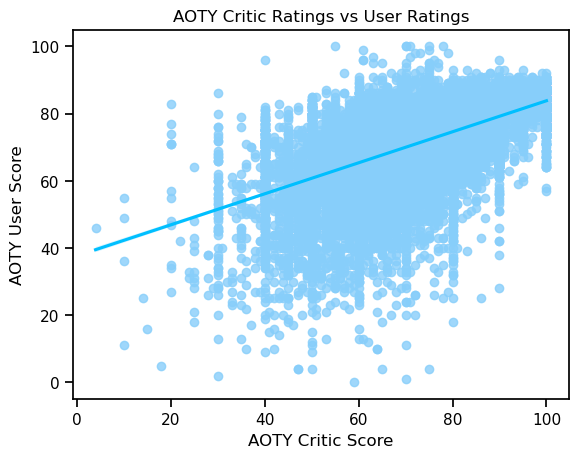

In [67]:
# Critic scores vs user scores.

sns.regplot(data=total_set, x='AOTY Critic Score', y='AOTY User Score', color='lightskyblue', line_kws={'color':'deepskyblue'})
plt.title('AOTY Critic Ratings vs User Ratings')

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\575592172.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = total_set.groupby('Release Year').mean()


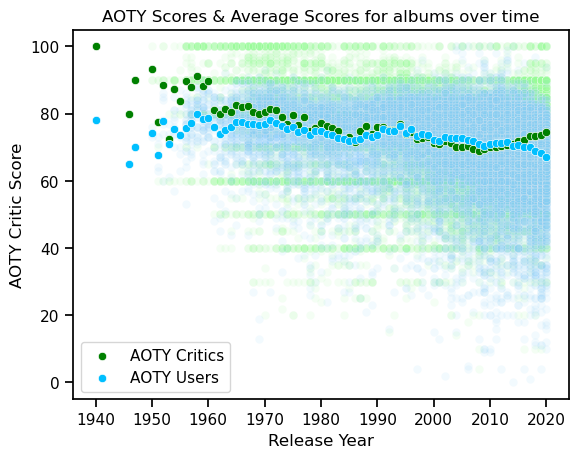

In [68]:
# Critic/user mean scores over time.

sns.scatterplot(data=total_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.1)
sns.scatterplot(data=total_set, x='Release Year', y='AOTY User Score', color="lightskyblue", alpha=0.1)

plt.title('AOTY Scores & Average Scores for albums over time')

mean_df = total_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='green', label='AOTY Critics')
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='deepskyblue', label='AOTY Users')

plt.legend()
plt.show()

<Axes: >

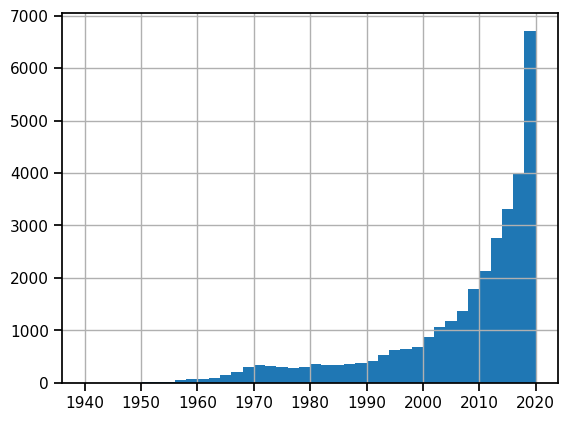

In [69]:
# Albums released per year.

total_set['Release Year'].hist(bins=40)

In [70]:
# Genres represented in each year

yearly_genre_counts = pd.DataFrame(index = range(1940, 2021))

for year in range(1940, 2021) :
    current_df = total_set[total_set['Release Year']==year]
    count = len(current_df['Genre'].value_counts())
    yearly_genre_counts.loc[year, 'Count'] = count

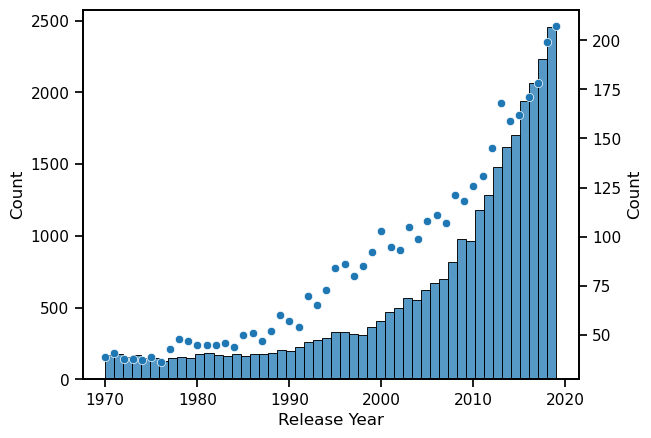

In [71]:
timed_total = total_set[(total_set['Release Year'] >= 1970) & (total_set['Release Year'] < 2020)]
timed_genre_counts = yearly_genre_counts.loc[1970:2019]


fig, ax1 = plt.subplots()

sns.histplot(timed_total['Release Year'], bins=50, ax=ax1)

ax2 = ax1.twinx()

sns.scatterplot(x=timed_genre_counts.index, y=timed_genre_counts['Count'], ax=ax2)

plt.show()



In [72]:
timed_total

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews,Release Decade
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55,2000
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8,2000
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335,2000
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38,2000
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32329,Amplifier,Echo Street,NaN,NaN,2013,LP,NaN,NaN,59.0,5.0,NaN,NaN,80,2,80,2,2010
32331,yU,The Earn,December,17,2011,LP,Mello Music Group,NaN,86.0,5.0,7.2,5.0,80,1,84,1,2010
32332,Firewater,The Golden Hour,May,6,2008,LP,Bloodshot,Indie Rock,72.0,6.0,8.7,13.0,72,3,60,1,2000
32335,The Lions,This Generation,February,26,2013,LP,Stones Throw Records,NaN,80.0,4.0,NaN,NaN,80,1,83,1,2010


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2228425637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2228425637.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = timed_total.groupby('Release Month').mean().reset_index()


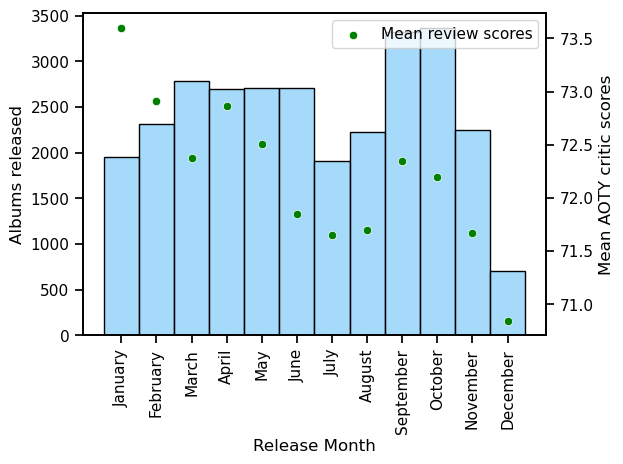

In [97]:
# Releases and ratings by month

fig, ax1 = plt.subplots()

month_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, \
               'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}

timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)

sns.histplot(timed_total['Release Month'], color='lightskyblue', ax=ax1, label='Albums released')
plt.ylabel('Albums released')
plt.xticks(rotation=90)

agg = timed_total.groupby('Release Month').mean().reset_index()
ax2 = ax1.twinx()
sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', ax=ax2, color='green', label='Mean review scores')
plt.ylabel('Mean AOTY critic scores')

plt.legend()
plt.tight_layout()
plt.show()

Index(['Artist', 'Title', 'Release Month', 'Release Day', 'Release Year',
       'Format', 'Label', 'Genre', 'Metacritic Critic Score',
       'Metacritic Reviews', 'Metacritic User Score',
       'Metacritic User Reviews', 'AOTY Critic Score', 'AOTY Critic Reviews',
       'AOTY User Score', 'AOTY User Reviews', 'Release Decade'],
      dtype='object')

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\873316843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\873316843.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = timed_total.groupby('Release Month').mean().reset_index()


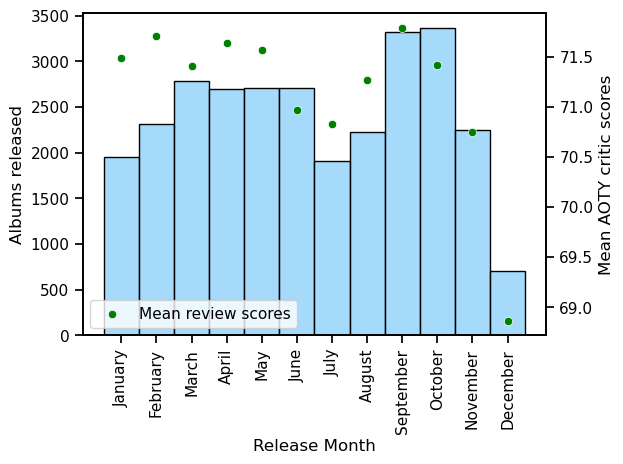

In [98]:
# Releases and ratings by month

fig, ax1 = plt.subplots()

month_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, \
               'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}

timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)

sns.histplot(timed_total['Release Month'], color='lightskyblue', ax=ax1, label='Albums released')
plt.ylabel('Albums released')
plt.xticks(rotation=90)

agg = timed_total.groupby('Release Month').mean().reset_index()
ax2 = ax1.twinx()
sns.scatterplot(data=agg, x='Release Month', y='AOTY User Score', ax=ax2, color='green', label='Mean review scores')
plt.ylabel('Mean AOTY critic scores')

plt.legend()
plt.tight_layout()
plt.show()

In [74]:
timed_total = timed_total.dropna(subset=['Release Month'])

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


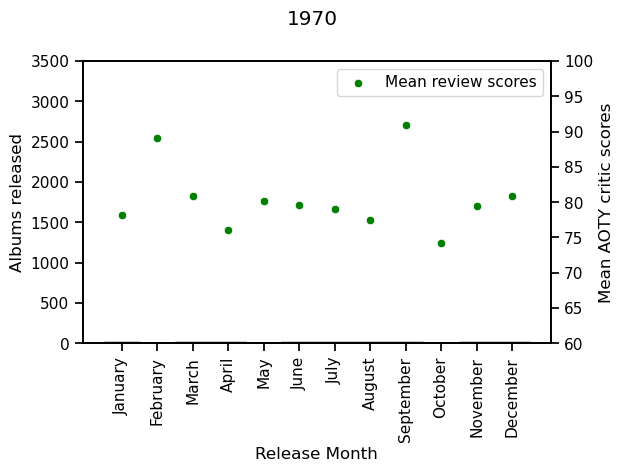

1971
1971


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFr

1972


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1973


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1974


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1975


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1976


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1977


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1978


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1979


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1980


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1981


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1982


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1983


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1984


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1985


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1986


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1987


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1988


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1989


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1990


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1991


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1992


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1993


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1994


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1995


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1996


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1997


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1998


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1999


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2000


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2001


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2002


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2003


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2004


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2005


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2006


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2007


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2008


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2009


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2010


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2011


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2012


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2013


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2014


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2015


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2016


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2017


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2018


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


<Figure size 640x480 with 0 Axes>

In [96]:
# NOTE: Make a moving bar chart of release months hists per year, moving from 70-19

fig, ax = plt.subplots()

current_year=1970
current_df = timed_total[timed_total['Release Year']==current_year]

hist = sns.histplot(current_df['Release Month'], \
                    color='lightskyblue', label='Albums released', ax=ax)
plt.ylabel('Albums released')
plt.xticks(rotation=90)
plt.ylim(0, 3500)

ax2 = ax.twinx()
agg = current_df.groupby('Release Month').mean().reset_index()
scat = sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', color='green', \
                       label='Mean review scores', ax=ax2)
plt.ylabel('Mean AOTY critic scores')
plt.ylim(60, 100)

fig.suptitle(f'{current_year}')
plt.tight_layout()
plt.show()

def update(frame) :
    global scat

    current_year = 1970+frame
    print(current_year)
    current_df = timed_total[timed_total['Release Year']==current_year]

    ax.clear()

    hist = sns.histplot(current_df['Release Month'], \
                    color='lightskyblue', label='Albums released', ax=ax)
    hist.set_ylabel('Albums released')
    hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
    hist.set_ylim(0, 275)
    
    ax2 = ax.twinx()
    
    scat.remove()

    agg = current_df.groupby('Release Month').mean().reset_index()
    
    scat = sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', color='green', \
                           label='Mean review scores', ax=ax2)
    scat.set_ylabel('Mean AOTY critic scores')
    scat.set_ylim(60, 100)

    fig.suptitle(f'{current_year}')
    plt.tight_layout()

animation = FuncAnimation(fig, update, frames=range(1, 49), interval=500)

animation.save('plot.gif', writer='pillow')

In [88]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)

ani.save('animated_plot_2.gif', writer='pillow', fps=30)

plt.show()

<IPython.core.display.Javascript object>

c:\Users\Josh\anaconda3\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


PLOTS
---

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\3214363944.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


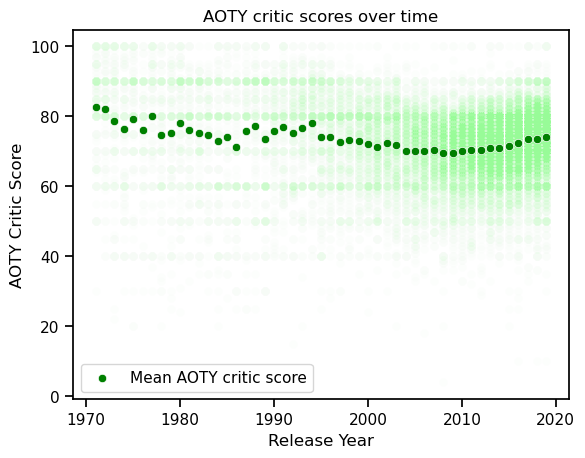

In [163]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)

plt.title('AOTY critic scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Mean AOTY critic score', ax=ax)


plt.legend()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\98623433.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


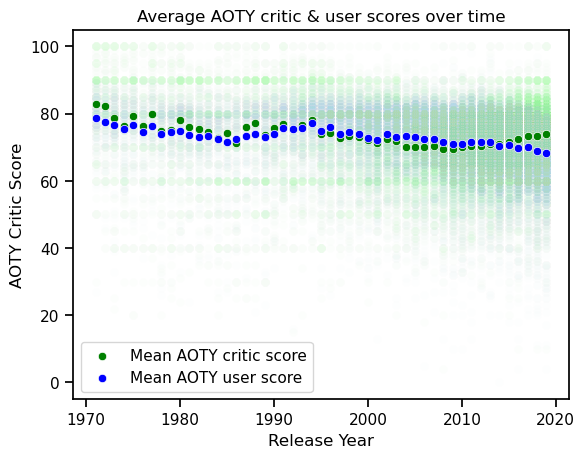

In [164]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)
# sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic Critic Score', color="Yellow", alpha=0.02, ax=ax)
# sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic User Score', color="Red", alpha=0.02, ax=ax)

plt.title('Average AOTY critic & user scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Mean AOTY critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Mean AOTY user score', ax=ax)
# sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic Critic Score', color='Yellow', label='MC Critics', ax=ax)
# sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic User Score', color='Red', label='MC Users', ax=ax)


plt.legend()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2624440180.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


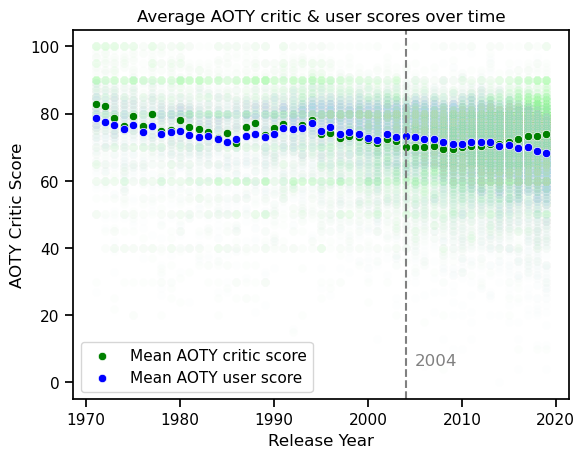

In [165]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)

plt.title('Average AOTY critic & user scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Mean AOTY critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Mean AOTY user score', ax=ax)

plt.axvline(x=2004, color='Gray', linestyle='--')
plt.annotate('2004', color='Gray', xy=(2005, 5))

plt.legend()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2741769680.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


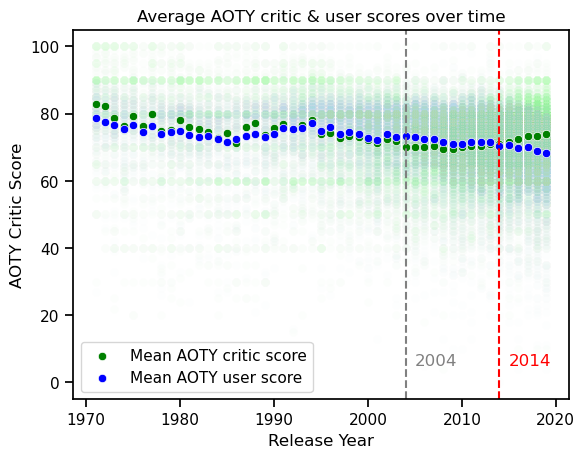

In [166]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)

plt.title('Average AOTY critic & user scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Mean AOTY critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Mean AOTY user score', ax=ax)

plt.axvline(x=2004, color='Gray', linestyle='--')
plt.annotate('2004', color='Gray', xy=(2005, 5))

plt.axvline(x=2014, color='Red', linestyle='--')
plt.annotate('2014', color='Red', xy=(2015, 5))

plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of genres represented in each year')

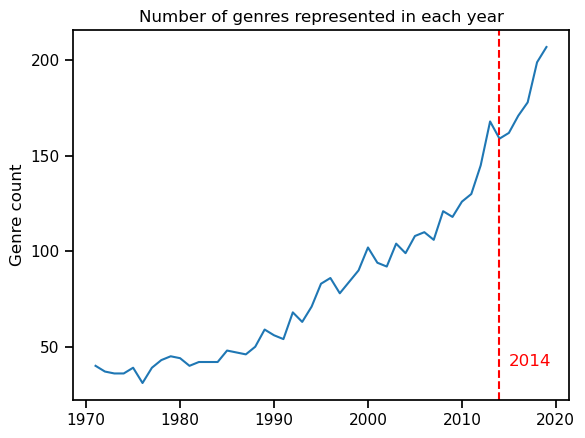

In [219]:
count_df = post_70_set.groupby('Release Year').count()

for year in range(1971, 2020) :
    genres = len(post_70_set[post_70_set['Release Year']==year]['Genre'].unique())
    count_df.loc[year, 'Genres Per Year'] = genres


sns.lineplot(data=count_df, x='Release Year', y='Genres Per Year')
plt.xlabel('')
plt.ylabel('Genre count')
plt.yticks([50, 100, 150, 200])

# plt.axvline(x=2004, color='Gray', linestyle='--')
# plt.annotate('2004', color='Gray', xy=(2005, 40))

plt.axvline(x=2014, color='Red', linestyle='--')
plt.annotate('2014', color='Red', xy=(2015, 40))

plt.title('Number of genres represented in each year')

Text(0.5, 1.0, 'Number of albums released in each year')

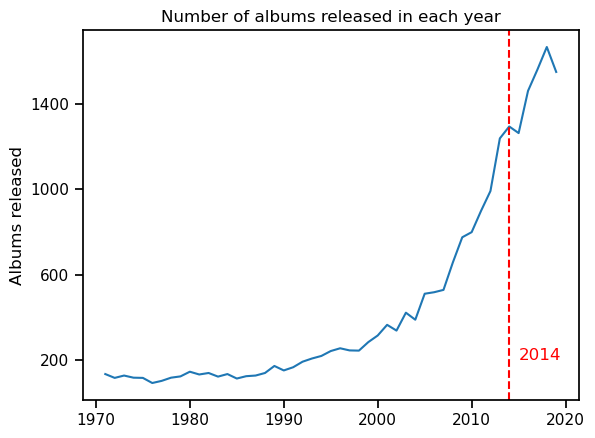

In [223]:
count_df = post_70_set.groupby('Release Year').count()

sns.lineplot(data=count_df, x='Release Year', y='Title')

# plt.axvline(x=2004, color='Gray', linestyle='--')
# plt.annotate('2004', color='Gray', xy=(2005, 200))

plt.axvline(x=2014, color='Red', linestyle='--')
plt.annotate('2014', color='Red', xy=(2015, 200))
plt.xlabel('')
plt.ylabel('Albums released')
plt.yticks([200, 600, 1000, 1400])

plt.title('Number of albums released in each year')

In [168]:
count_df.columns

Index(['Artist', 'Title', 'Release Month', 'Release Day', 'Format', 'Label',
       'Genre', 'Metacritic Critic Score', 'Metacritic Reviews',
       'Metacritic User Score', 'Metacritic User Reviews', 'AOTY Critic Score',
       'AOTY Critic Reviews', 'AOTY User Score', 'AOTY User Reviews',
       'Release Decade'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)

plt.title('Average AOTY critic & user scores over time')

mean_df = post_70_set.groupby('Release Year').mean()

# Use separate axes for mean scatter plots
ax_critic = ax.twinx()
ax_user = ax.twinx()

# Plot mean AOTY critic score on ax_critic
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Mean AOTY critic score', ax=ax_critic)
ax_critic.set_ylabel('Mean AOTY critic score')

# Plot mean AOTY user score on ax_user
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Mean AOTY user score', ax=ax_user)
ax_user.set_ylabel('Mean AOTY user score')

# Add a common legend outside the plot area
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.axvline(x=2004, color='Gray', linestyle='--')
plt.annotate('2004', color='Gray', xy=(2004, 0), xytext=(2004, -5), ha='center')

plt.show()

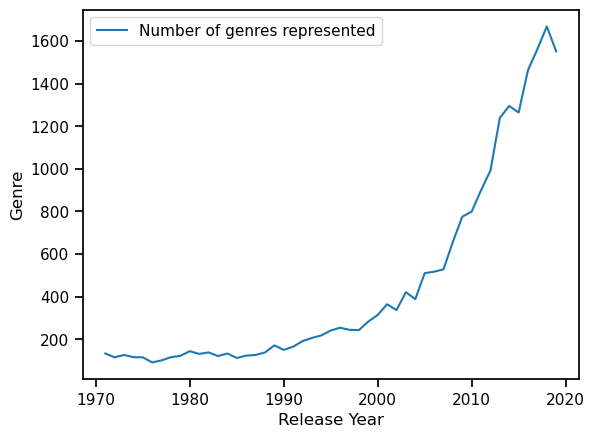

In [172]:

count_df = post_70_set.groupby('Release Year').count()

ax2 = ax.twinx()

sns.lineplot(data=count_df, x='Release Year', y='Genre', label='Number of genres represented')

ax.axvline(x=2015, color='Black', linestyle='--')